<a href="https://colab.research.google.com/github/mleyvaz/AV/blob/master/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret
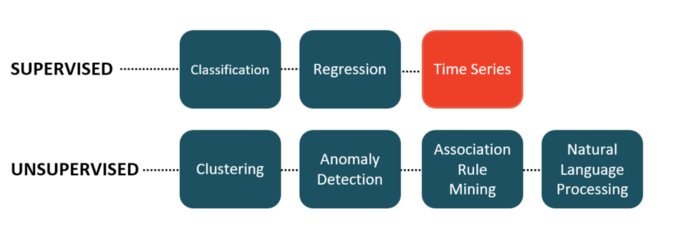

# Intalación

In [ ]:
pip install pycaret

In [ ]:
pip install markupsafe==2.0.1

# Ciclo de vida de un proyecto de Machine Learning
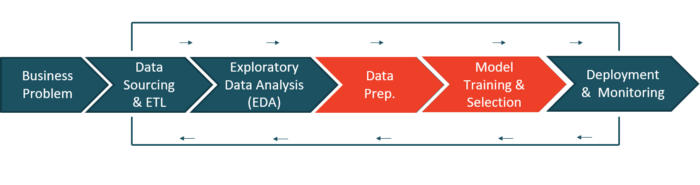

# Problema Comprar un Diamante

Datos

In [ ]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

Análisis exploratorio se datos

In [ ]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

Preparacion de los datos

In [ ]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

Seleccionar Modelo 

In [ ]:
# compare all models
best = compare_models()


In [ ]:
# Modelo paralelo
lightgbm = create_model('lightgbm',  multi_core = True)

In [ ]:
# check feature importance
plot_model(lightgbm, plot = 'feature')

Guardar  Modelo 

In [ ]:
# finalize the model
final_best = finalize_model(lightgbm)
# save model to disk
save_model(final_best, 'diamond-pipeline')